# Multiply matrixes

## Exercise 1

In [4]:
!{"make clean"}
# remove everything to be centrainly sure it's not anything compiled left
cmd = 
!{"make adder"}

rm -f *.o *.mod *.i90 *~ *.tmp *.s *.dbg
rm -f -r *.dSYM
find . -name "*genmod*" -type f -delete
rm main main2 test test_with_dot
rm: main: No such file or directory
rm: main2: No such file or directory
rm: test: No such file or directory
rm: test_with_dot: No such file or directory
make: *** [clean] Error 1
gcc define-adder.cpp -o define-header


 `define-header` is a very strange solution do add macros (`USE_DOT` and `USE_CACHE`) to file. It did wish to use macro to make test as hermetic as possible and then find it impossible to compile tests with given flag. So maybe it's not the best solution but it works and I would like not to care about it as it's not matter of task

In [6]:
!{"./define-header 0 0"}

In [10]:
silence = !{"make test"}
# as compilation gives a lot of warnings

In [11]:
!{"./test"}

......
Time:         0.004 seconds
  
 OK
 (6 tests)


## Exercise 2

## use cache, no dot

In [17]:
silence = !{"make clean"}
!{"./define-header 0 1"}
silence = !{"make test"}
!{"./test"}

......
Time:         0.004 seconds
  
 OK
 (6 tests)


# use dot, not cache

In [19]:
silence = !{"make clean"}
!{"./define-header 0 1"}
silence = !{"make test"}
!{"./test"}

......
Time:         0.003 seconds
  
 OK
 (6 tests)


 # use dot, use cache

In [25]:
silence = !{"make clean"}
!{"./define-header 1 1"}
silence = !{"make test"}
!{"./test"}

......
Time:         0.003 seconds
  
 OK
 (6 tests)


# Exercise 3

In [1]:
silence = !{"make clean"}
!{"./define-header 0 0"}
silence = !{"make main"}
nocachenodot = []
for j in range(1, 10):
    cmd = f"./main {2 ** j}"
    r = !{cmd}
    nocachenodot.append(float(r[2]))
print("done!")

done!


In [2]:
silence = !{"make clean"}
!{"./define-header 1 0"}
silence = !{"make main"}
nocachedot = []
for j in range(1, 11):
    cmd = f"./main {2 ** j}"
    r = !{cmd}
    nocachedot.append(float(r[2]))
print("done!")

done!


In [3]:
silence = !{"make clean"}
!{"./define-header 1 1"}
silence = !{"make main"}
cachedot = []
for j in range(1, 11):
    cmd = f"./main {2 ** j}"
    r = !{cmd}
    cachedot.append(float(r[2]))
print("done!")

done!


In [4]:
silence = !{"make clean"}
!{"./define-header 0 1"}
silence = !{"make main"}
cachenodot = []
for j in range(1, 11):
    cmd = f"./main {2 ** j}"
    r = !{cmd}
    cachenodot.append(float(r[2]))
print("done!")

done!


In [5]:
silence = !{"make clean"}
silence = !{"make main2"}
mm = []
for j in range(1, 12):
    cmd = f"./main2 {2 ** j}"
    r = !{cmd}
    mm.append(float(r[0]))
print("done!")

done!


In [6]:
import matplotlib.pyplot as plt

In [7]:
# range for plot
ran12 = []
for j in range(1, 12):
    ran12.append(2 ** j)
ran11 = []
for j in range(1, 11):
    ran11.append(2 ** j)
ran10 = []
for j in range(1, 10):
    ran10.append(2 ** j)

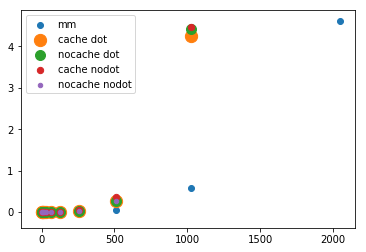

In [9]:
axes = plt.gca()
#axes.set_ylim([0,0.00000002])
plt.scatter(ran12, mm, label='mm')
plt.scatter(ran11, cachedot, label='cache dot', s=150)

plt.scatter(ran11, nocachedot, label='nocache dot',s=100)

plt.scatter(ran11, cachenodot, label='cache nodot', s=40)

plt.scatter(ran10, nocachenodot, label='nocache nodot', s=20)

l = plt.legend(loc='upper left')
l.set_zorder(20)  # put the legend on top
plt.show()


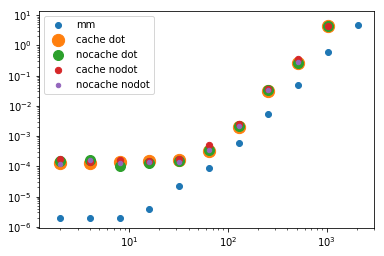

In [11]:
axes = plt.gca()
axes.set_yscale('log')
axes.set_xscale('log')
plt.scatter(ran12, mm, label='mm')
plt.scatter(ran11, cachedot, label='cache dot', s=150)

plt.scatter(ran11, nocachedot, label='nocache dot',s=100)

plt.scatter(ran11, cachenodot, label='cache nodot', s=40)

plt.scatter(ran10, nocachenodot, label='nocache nodot', s=20)

l = plt.legend(loc='upper left')
l.set_zorder(20)  # put the legend on top
plt.show()
